## Data Overview
The divorce dataset from the Machine Learning Repository at University of California
Irvine contains 170 responses to a survey. Of the 170 respondents, 84 (49%) divorced,
86 (51%) remained married. They were asked 54 questions and the answers to the
questions were collected on a 5-point scale (0-4): 0 Never
1 Seldom
2 Average
3 Frequently
4 Always

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Downloads/divorce.xlsx')

In [3]:
df.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [4]:
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [6]:
X.shape

(170, 54)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
# logit
model = sklearn.linear_model.LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
model.score(X_test, y_test)

1.0

In [58]:
pca = PCA(0.9)
X_pca = pca.fit_transform(X)
X_pca.shape, X.shape

((170, 9), (170, 54))

In [59]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [60]:
pca.explained_variance_ratio_

array([0.7722181 , 0.03526505, 0.02553995, 0.01483938, 0.01328308,
       0.01184865, 0.01120409, 0.00944362, 0.00894489])

In [61]:
pca.n_components_

9

In [62]:
model_pca = sklearn.linear_model.LogisticRegression()
model_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [63]:
model_pca.score(X_test_pca, y_test)

1.0

In [64]:
import numpy as np
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
per_var

array([77.2,  3.5,  2.6,  1.5,  1.3,  1.2,  1.1,  0.9,  0.9])

In [65]:
import matplotlib.pyplot as plt
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

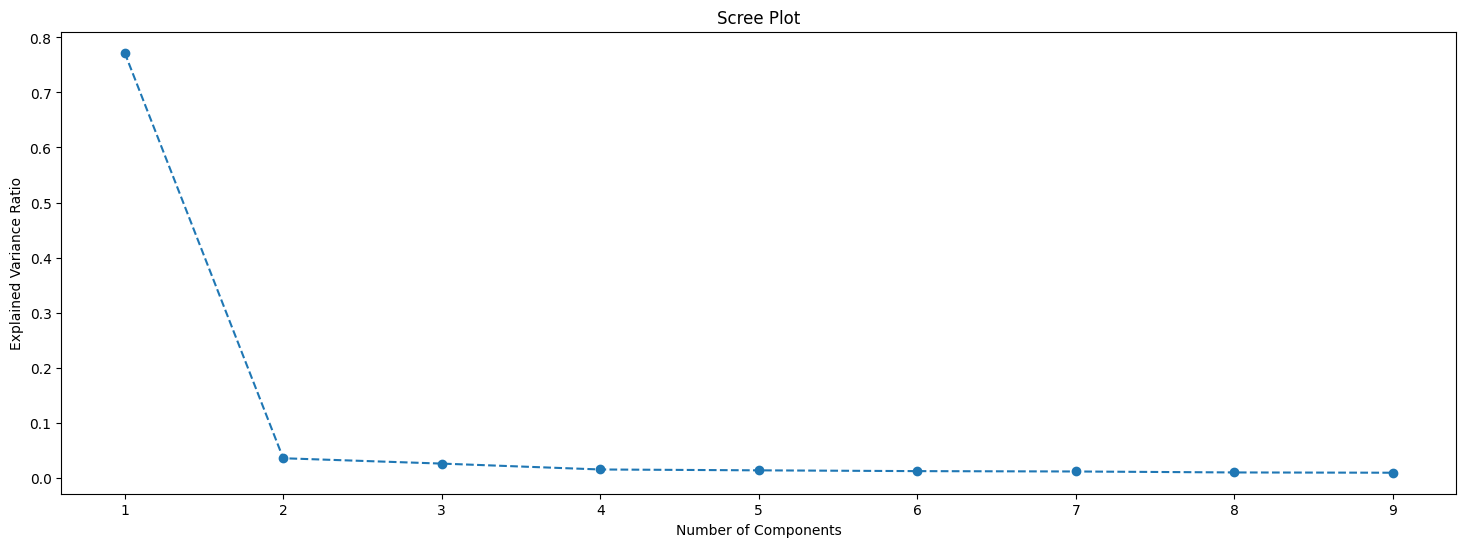

In [66]:
# Scree plot
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [67]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(X)

# Get rotated factor scores
factor_scores = fa.transform(X)
df_rotated = pd.concat([df, pd.DataFrame(factor_scores, columns=['Factor1', 'Factor2'])], axis=1)

In [68]:
df_rotated.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class,Factor1,Factor2
0,2,2,4,1,0,0,0,0,0,0,...,3,3,3,2,3,2,1,1,-0.339382,-0.386441
1,4,4,4,4,4,0,0,4,4,4,...,3,4,4,4,4,2,2,1,2.113629,-1.537889
2,2,2,2,2,1,3,2,1,1,2,...,3,1,1,1,2,2,2,1,1.416562,-1.289219
3,3,2,3,2,3,3,3,3,3,3,...,3,3,3,3,2,2,2,1,1.699777,-1.382170
4,2,2,1,1,1,1,0,0,0,0,...,2,3,2,2,2,1,0,1,-0.407548,-0.526137


In [69]:
# Compute correlation matrix
correlation_matrix = np.corrcoef(X.T, X_pca.T)[:df.shape[1], df.shape[1]:]
correlation_matrix.shape

(55, 8)

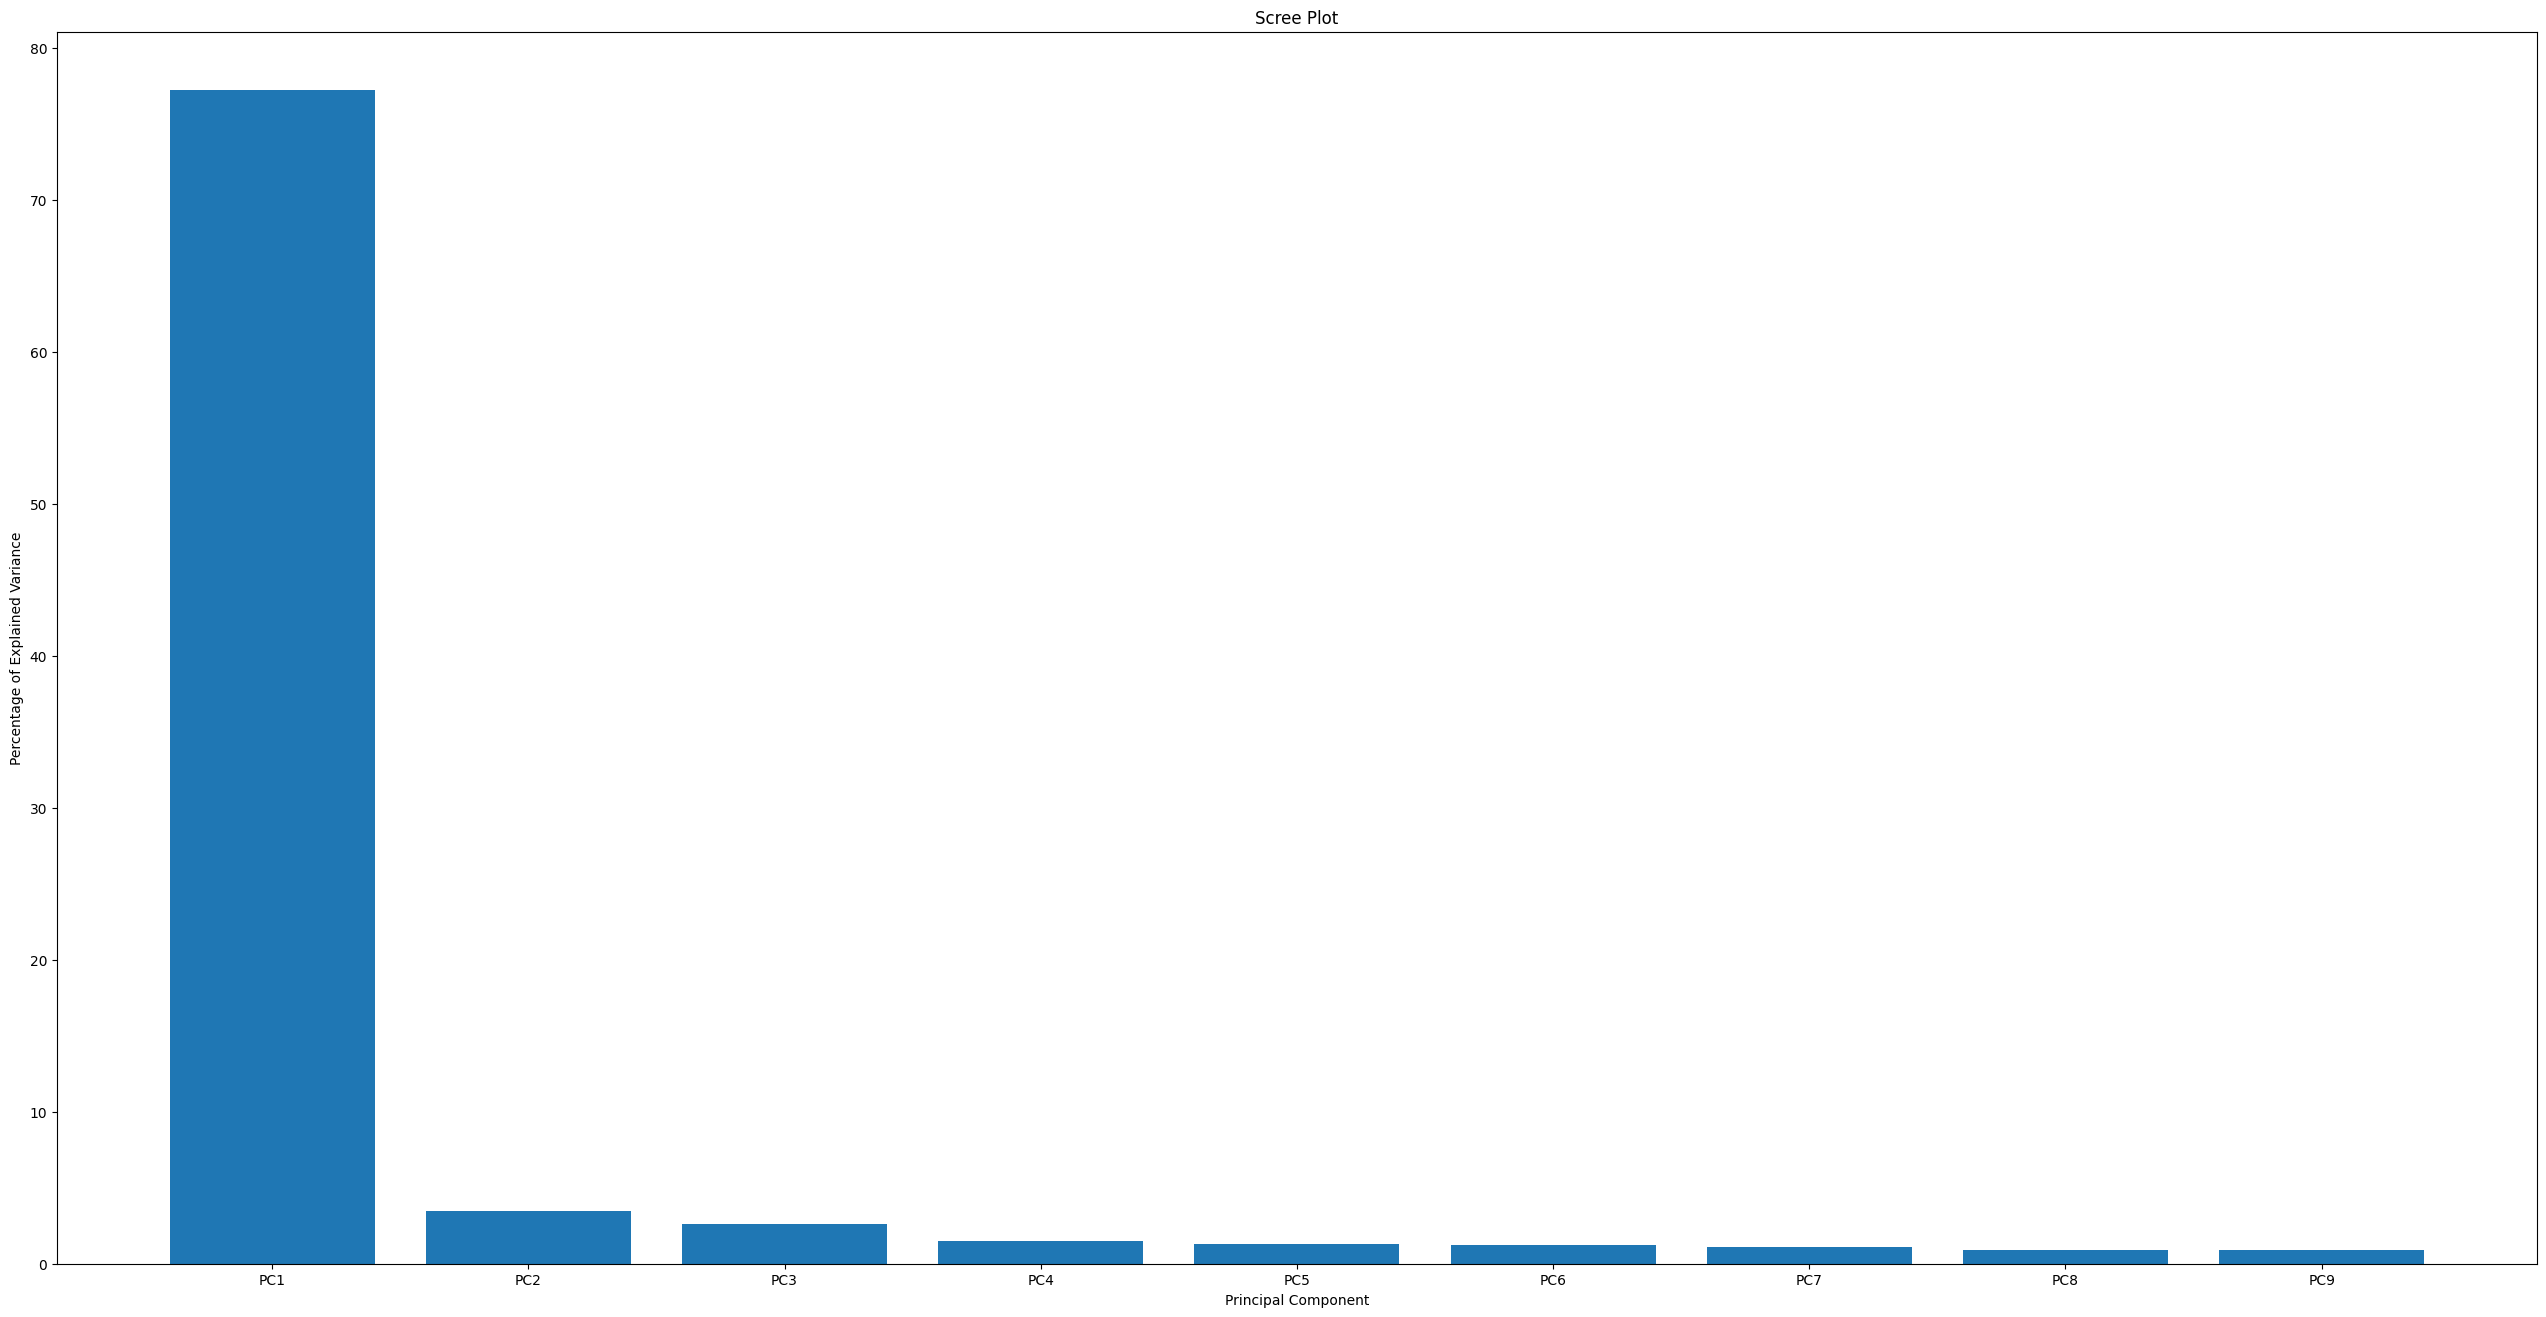

In [70]:
plt.figure(figsize=(32, 16))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

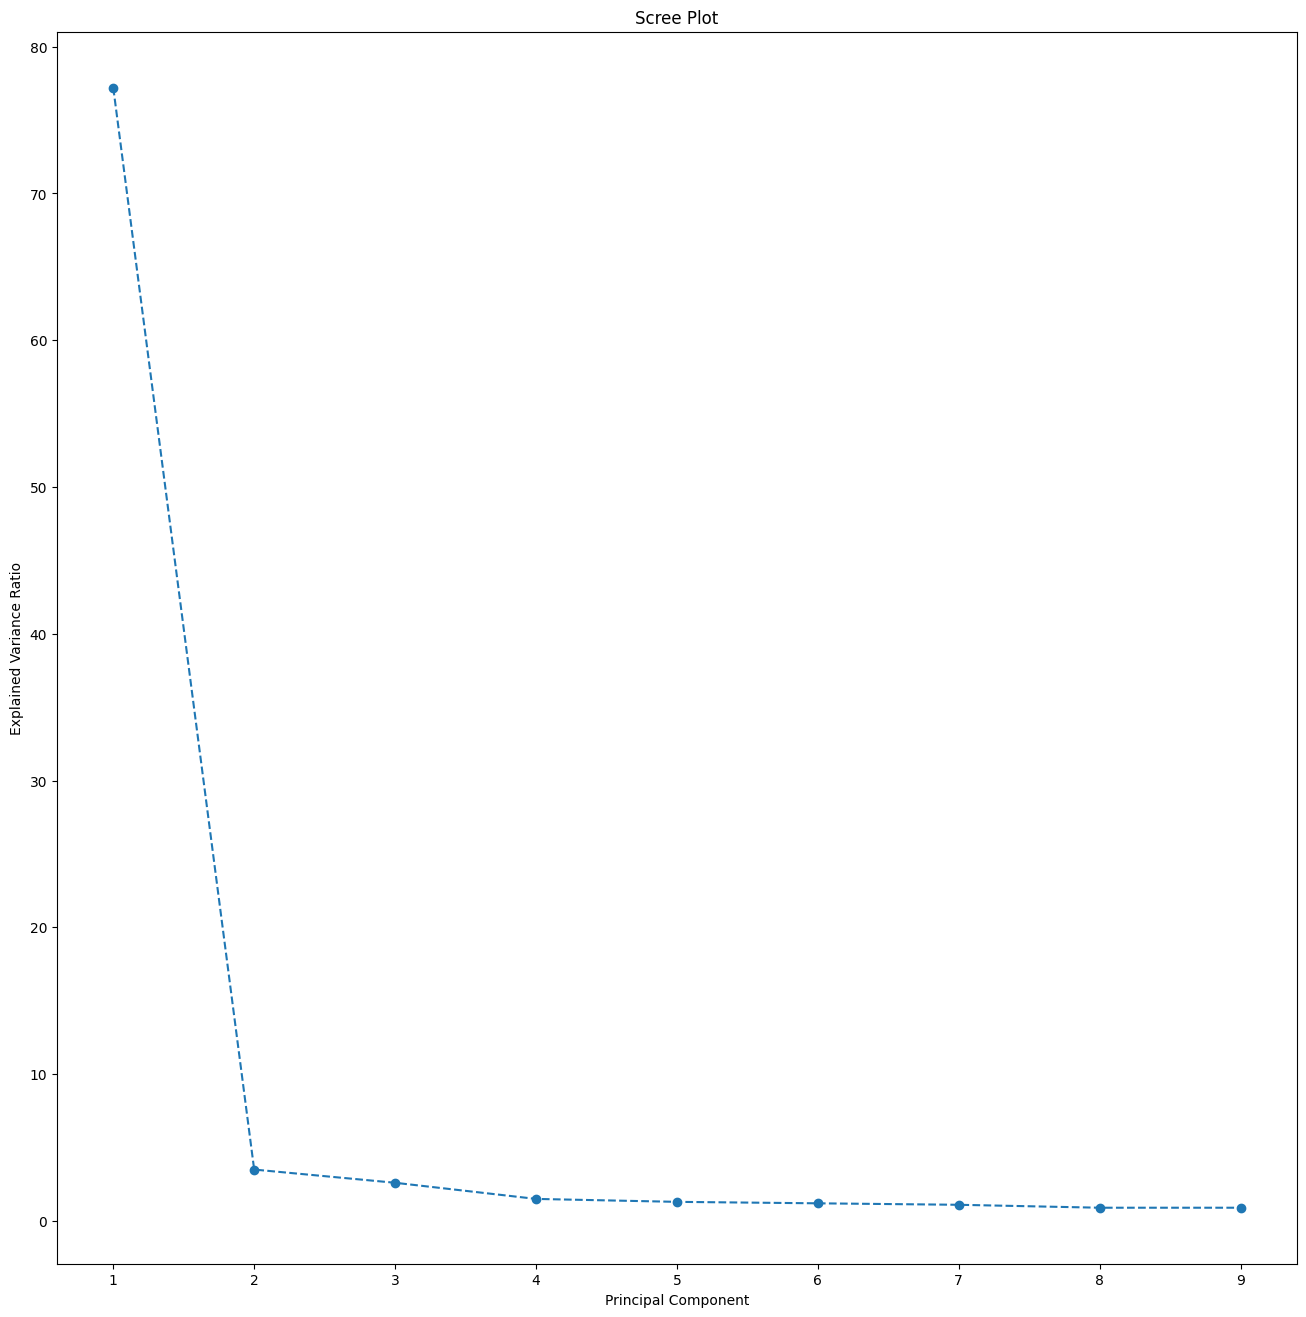

In [71]:
plt.figure(figsize=(16, 16))
plt.plot(range(1, len(per_var) + 1), per_var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(per_var) + 1))
plt.show()

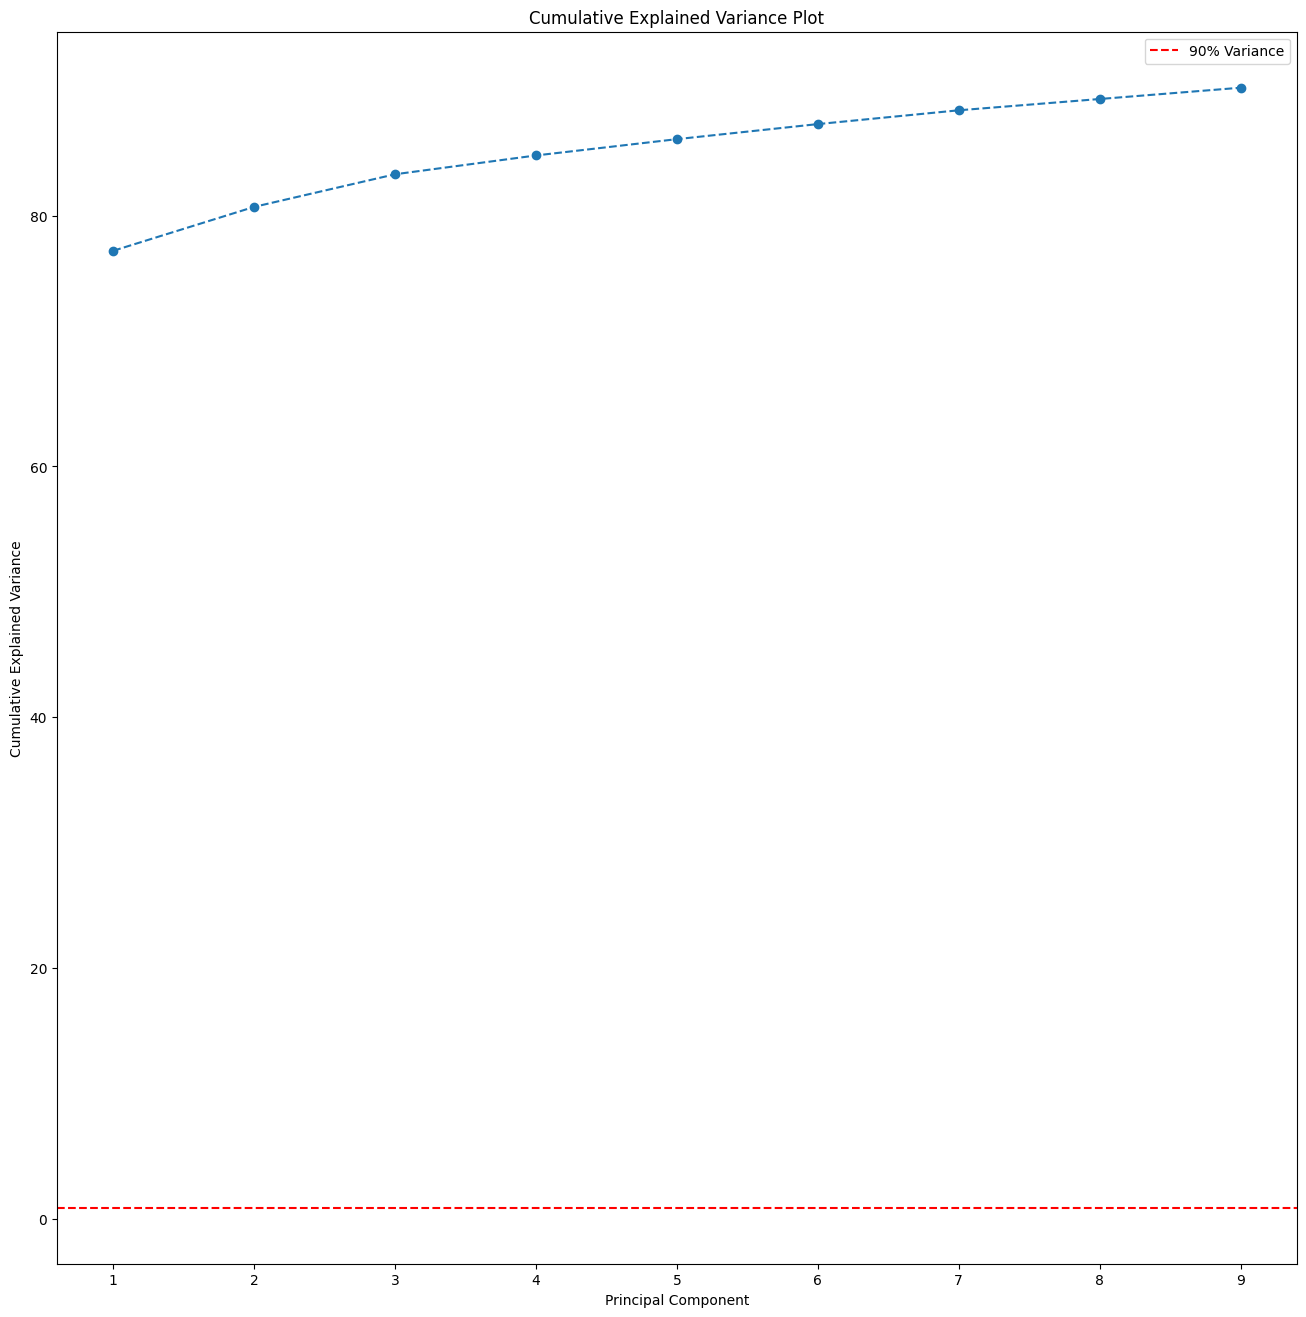

NameError: name 'fig' is not defined

In [73]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(per_var)

# Cumulative Scree Plot
plt.figure(figsize=(16, 16))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')  # For example, 90% threshold
plt.legend(loc='best')
plt.show()
fig